# 지도학습(2) - 회귀

#### 단순 선형 회귀 분석으로 농어의 길이를 가지고 무게를 예측하는 모델을 만들어보자

### #01. 작업준비

패키지 가져오기

In [37]:
import sys
import numpy as np
import seaborn as sb                                    # 데이터 시각화를 위한 모듈
from pandas import read_excel                           # 엑셀 데이터를 가져오기 위한 모듈
from matplotlib import pyplot as plt                    # 그래프 그리기 위한 모듈

from sklearn.linear_model import LinearRegression       # 선형회귀분석 모듈
from sklearn.model_selection import train_test_split    # 훈련/검증 데이터 분리 모듈

#### 데이터가져오기

In [38]:
origin = read_excel("https://data.hossam.kr/F02/fish.xlsx")
origin = origin[['길이', '무게']]
origin.head()

,길이,무게
0,8.4,5.9
1,13.7,32.0
2,15.0,40.0
3,16.2,51.5
4,17.4,70.0


### #02. 데이터 전처리
### 훈련데이터와 검증데이터 분할
- 훈련데이터(train_data) : 모델을 생성하는데 사용되는 데이터
- 검증데이터(test_data) : 모델이 얼마나 잘 만들어졌는지 확인하는 용도
#### 데이터 프레임을 통째로 넣는 경우

데이터 프레임에 독립변수와 종속변수가 모두 포함되어 있는형태

같은 유형으로 7:3으로 분할된 두 개의 데이터프레임이 반환된다.

In [39]:
train, test = train_test_split(origin, train_size=0.7, random_state=42)

In [40]:
train.head()

,길이,무게
4,17.4,70.0
41,36.0,700.0
27,25.0,180.0
47,40.0,850.0
46,39.0,820.0


In [41]:
test.head()

,길이,무게
0,8.4,5.9
5,18.0,100.0
33,27.5,250.0
13,21.3,130.0
19,22.5,130.0


#### 데이터 프레임을 독립변수와 종속변수로 분리하여 사용하는경우

독립변수를 7:3으로 분할한 형태와 독립변수를 7:3으로 분할한 형태가 반환된다.

총 4개의 데이터 프레임이 리턴된다.

In [42]:
x_data = origin[['길이']]
y_data = origin[['무게']]

In [43]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.3, random_state=42)

In [44]:
x_train

,길이
4,17.4
41,36.0
27,25.0
47,40.0
46,39.0
52,43.0
15,22.0
9,20.0
16,22.0
24,24.0


In [45]:
x_test

,길이
0,8.4
5,18.0
33,27.5
13,21.3
19,22.5
50,40.0
36,30.0
26,24.6
44,39.0
12,21.0


In [46]:
y_train

,무게
4,70.0
41,700.0
27,180.0
47,850.0
46,820.0
52,1000.0
15,120.0
9,85.0
16,130.0
24,225.0


### #03. 분석

#### 선형회귀 분석 수행

In [47]:
model = LinearRegression()
fit = model.fit(x_train, y_train)

print("계수:", fit.coef_)
print("절편:", fit.intercept_)
print("설명력:", fit.score(x_train, y_train))

print("y = {0: .2f} * X + {1: .2f}".format(fit.coef_[0][0], fit.intercept_[0]))

계수: [[39.27726005]]
절편: [-718.43907189]
설명력: 0.9371680443381393
y =  39.28 * X + -718.44


#### 분석결과 시각화

c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 44600 (\N{HANGUL SYLLABLE GIL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 47924 (\N{HANGUL SYLLABLE MU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 44172 (\N{HANGUL SYLLABLE GE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


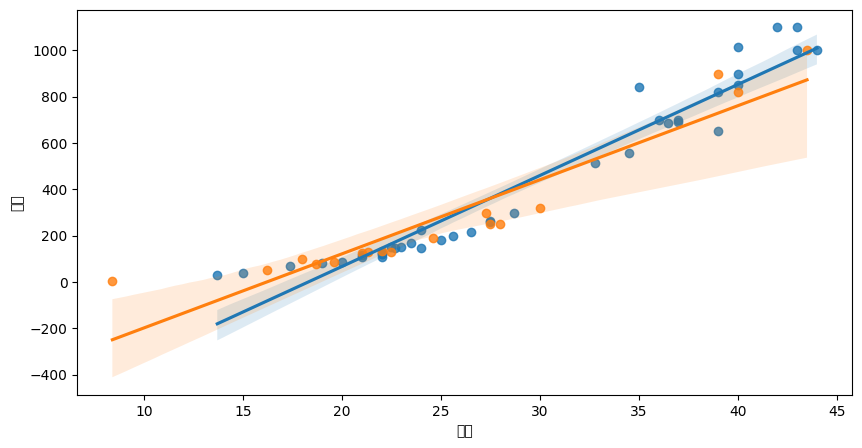

In [48]:
plt.figure(figsize=(10,5))
# 원본 데이터 전체
# sb.regplot(data=origin, x="길이", y="무게")

# 학습에 사용된 데이터만으로 산점도 그래프 그리기
sb.regplot(x=x_train['길이'], y=y_train['무게'], label='train data')
sb.regplot(x=x_test['길이'], y=y_test['무게'], label='test data')
plt.show()
plt.close()

> ##### 91%라는 설명력에 비해 추세선으로부터 실제 데이터들이 너무 멀리 떨어져 있다.(=잔차가 크다)
> ##### 과대적합의 냄새가난다.

### #04. 과적합
##### 과소적합(underfitting)
###### 분석 모델이 너무 단순해서 데이터의 구조를 제대로 학습하지 못할 경우
![img](res/5.png)
###### 모델이 단순하다는 의미는 변수(피처)의 수가 부족함을 의미함

##### 해결방법
- 모델 파라미터가 더 많은 모델을 선택(단순선형회귀 -> 다항회귀)
- 학습 알고리즘에 더 좋은 특성을 제공
> ###### 결국은 변수를 늘리라는 뜻

#### 과대적합
훈련 데이터에 있는 잡음의 양이 모델에 비해 너무 복잡한 경우 설명력에 비해 잔차가 큰 경우라고 할 수 있다. 
![img](res/6.png)

##### 해결방법
- 파라미터 수가 적은 모델을 선택
- 훈련 데이터의 특성 수를 줄임
- 모델을 단순화 시킴
> ###### 결국은 변수를 줄이라는 뜻
- 훈련데이터의 잡음을 줄임
> ###### 이상치를 제거 


### #05. 다항회귀(단일피처 다항회귀, 곡선회귀)
데이터에 잘 맞는 일차 함수나 직선을 구하는 게 아니라 다항식이나 곡선을 구해서 학습하는 방법

하나의 입력변수에 대하여 차수를 확장하여 다차원 회귀 모델을 도출한다.

![img](res/7.png)
![img](res/8.png)

##### 데이터 전처리
훈련 데이터의 독립변수 추가

In [49]:
x_train['길이^2'] = x_train['길이'] ** 2
x_train.head()

,길이,길이^2
4,17.4,302.76
41,36.0,1296.00
27,25.0,625.00
47,40.0,1600.00
46,39.0,1521.00


검증 데이터의 독립변수 추가

In [50]:
x_test['길이^2'] = x_test['길이'] ** 2
x_test.head()

,길이,길이^2
0,8.4,70.56
5,18.0,324.00
33,27.5,756.25
13,21.3,453.69
19,22.5,506.25


분석

In [51]:
model = LinearRegression()
fit = model.fit(x_train, y_train)

print("계수 :", fit.coef_)
print("절편 :", fit.intercept_)
print("훈련데이터 설명력  :", fit.score(x_train, y_train))
print("검증 데이터 설명력 :", fit.score(x_test, y_test))

print("y = {0: .2f} * X + {1:.2f}".format(fit.coef_[0][0], fit.intercept_[0]))

계수 : [[-21.29590996   1.01075418]]
절편 : [111.3569755]
훈련데이터 설명력  : 0.9689339489485594
검증 데이터 설명력 : 0.9793091447729368
y = -21.30 * X + 111.36


분석 결과의 시각화

12.0 46.0


c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 44600 (\N{HANGUL SYLLABLE GIL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 47924 (\N{HANGUL SYLLABLE MU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 44172 (\N{HANGUL SYLLABLE GE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


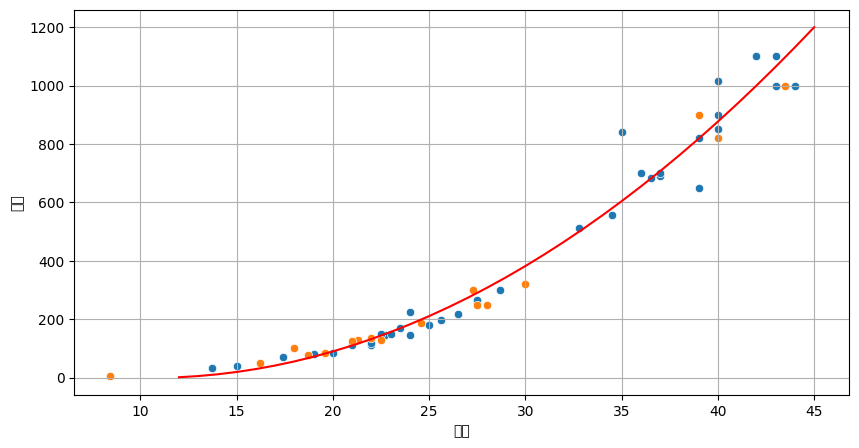

In [52]:
plt.figure(figsize=(10, 5))
sb.scatterplot(x=x_train['길이'], y=y_train['무게'])

# 그래프가 그려진 범위 안에서 1씩 증가하는 좌표를 생성
xmin, xmax = plt.xlim()
print(xmin.round(), xmax.round())
xrange = np.arange(xmin.round(), xmax.round(), 1)
#print(xrange)

# y값에 대한 추정치를 계산
y_pred = xrange * fit.coef_[0][0] + xrange**2 * fit.coef_[0][1] + fit.intercept_[0]
#print(y_pred)

sb.scatterplot(x=x_test['길이'], y=y_test['무게'])
sb.lineplot(x=xrange, y=y_pred, color='red')

plt.grid()
plt.show()
plt.close()

농어의 무게에 영향을 줄만한 피쳐들 추가
###### 길이와 높이
![img](res/9.png)